In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

folder = os.path.join("/", "RanD", "CREMEv2_Result", "Reproducibility_Measurement", "Working")
destination_folder = os.path.join("/", "RanD", "CREMEv2_Result", "Reproducibility_Measurement", "Working", "traffic", "original")
data_dir = ["accounting", "syslog", "traffic"]
del_col = "Label"
del_cols_list = ["Label", "Label_lifecycle"]


In [3]:
# df1 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230113.csv"))
# df2 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230207.csv"))
df1 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230310.csv"))
df2 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230420.csv"))
# df5 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230420B.csv"))
df3 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230424.csv"))
df4 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230426.csv"))
df5 = pd.read_csv(os.path.join(folder, "traffic", "clean_label_traffic_20230502.csv"))

max_cols = max(df1.shape[1], df2.shape[1], df3.shape[1], df4.shape[1], df5.shape[1])

print(max_cols)



59


In [4]:

df1 = df1.reindex(columns=[*df1.columns.tolist(), *[f"col_{i+1}" for i in range(max_cols - df1.shape[1])]])
df2 = df2.reindex(columns=[*df2.columns.tolist(), *[f"col_{i+1}" for i in range(max_cols - df2.shape[1])]])
df3 = df3.reindex(columns=[*df3.columns.tolist(), *[f"col_{i+1}" for i in range(max_cols - df3.shape[1])]])
df4 = df4.reindex(columns=[*df4.columns.tolist(), *[f"col_{i+1}" for i in range(max_cols - df4.shape[1])]])
df5 = df5.reindex(columns=[*df5.columns.tolist(), *[f"col_{i+1}" for i in range(max_cols - df5.shape[1])]])

In [5]:
np1 = df1.values
np2 = df2.values
np3 = df3.values
np4 = df4.values
np5 = df5.values

mean1_val = np.nanmean(np1, axis=1)
mean2_val = np.nanmean(np2, axis=1)
mean3_val = np.nanmean(np3, axis=1)
mean4_val = np.nanmean(np4, axis=1)
mean5_val = np.nanmean(np5, axis=1)



In [6]:
df1['col_1'] = df1['col_1'].replace('nan', np.nan).fillna(0)
df1['col_2'] = df1['col_2'].replace('nan', np.nan).fillna(0)

df3['col_1'] = df3['col_1'].replace('nan', np.nan).fillna(0)
df3['col_2'] = df3['col_2'].replace('nan', np.nan).fillna(0)

df4['col_1'] = df4['col_1'].replace('nan', np.nan).fillna(0)


df5['col_1'] = df5['col_1'].replace('nan', np.nan).fillna(0)
df5['col_2'] = df5['col_1'].replace('nan', np.nan).fillna(0)
df5['col_3'] = df5['col_3'].replace('nan', np.nan).fillna(0)

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pca = PCA(n_components=2)

ground_truth_scaled = scaler.fit_transform(df1)

sec_1_scaled = scaler.fit_transform(df3)
sec_2_scaled = scaler.fit_transform(df5)
sec_3_scaled = scaler.fit_transform(df4)
sec_4_scaled = scaler.fit_transform(df2)

In [8]:
ground_truth_covarianceMatrix = np.cov(np.transpose(np.array(ground_truth_scaled)))

sec_1_covarianceMatrix = np.cov(np.transpose(np.array(sec_1_scaled)))
sec_2_covarianceMatrix = np.cov(np.transpose(np.array(sec_2_scaled)))
sec_3_covarianceMatrix = np.cov(np.transpose(np.array(sec_3_scaled)))
sec_4_covarianceMatrix = np.cov(np.transpose(np.array(sec_4_scaled)))

pca_ground_truth = pca.fit(ground_truth_covarianceMatrix).transform(ground_truth_covarianceMatrix)

pca_sec_1 = pca.fit(sec_1_covarianceMatrix).transform(sec_1_covarianceMatrix)
pca_sec_2 = pca.fit(sec_2_covarianceMatrix).transform(sec_2_covarianceMatrix)
pca_sec_3 = pca.fit(sec_3_covarianceMatrix).transform(sec_3_covarianceMatrix)
pca_sec_4 = pca.fit(sec_4_covarianceMatrix).transform(sec_4_covarianceMatrix)

In [11]:
df_pca_ground_truth = pd.DataFrame(pca_ground_truth, columns =['comp1','comp2'])
df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)



df_pca_sec_1 = pd.DataFrame(pca_sec_1, columns =['comp1','comp2'])
df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)

df_pca_sec_2 = pd.DataFrame(pca_sec_2, columns =['comp1','comp2'])
df_pca_sec_2_vertical = df_pca_sec_2['comp1'].append(df_pca_sec_2['comp2']).reset_index(drop=True)

df_pca_sec_3 = pd.DataFrame(pca_sec_3, columns =['comp1','comp2'])
df_pca_sec_3_vertical = df_pca_sec_3['comp1'].append(df_pca_sec_3['comp2']).reset_index(drop=True)

df_pca_sec_4 = pd.DataFrame(pca_sec_4, columns =['comp1','comp2'])
df_pca_sec_4_vertical = df_pca_sec_4['comp1'].append(df_pca_sec_4['comp2']).reset_index(drop=True)


/tmp/ipykernel_2435701/1758673213.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)
/tmp/ipykernel_2435701/1758673213.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)
/tmp/ipykernel_2435701/1758673213.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_sec_2_vertical = df_pca_sec_2['comp1'].append(df_pca_sec_2['comp2']).reset_index(drop=True)
/tmp/ipykernel_2435701/1758673213.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use p

In [12]:
corr_gt_1 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_1_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_1))

correlation of the data is 0.9637159431277281


In [13]:
corr_gt_2 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_2_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_2))

correlation of the data is 0.7690079746099492


In [14]:
corr_gt_3 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_3_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_3))

correlation of the data is 0.9639007976236857


In [15]:
corr_gt_4 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_4_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_4))

correlation of the data is 0.7427829589020936


In [16]:
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_1))
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_2))
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_3))
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_4))

PCC 1st Test Scenario: 0.9637
PCC 1st Test Scenario: 0.7690
PCC 1st Test Scenario: 0.9639
PCC 1st Test Scenario: 0.7428


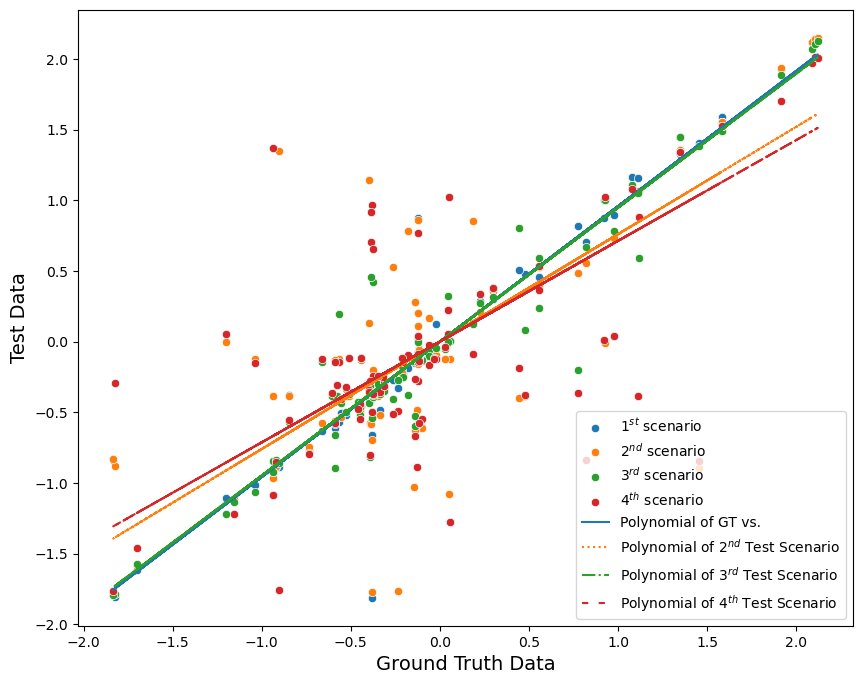

In [17]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

#colors = sns.set_palette("tab10", n_colors=10)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_1_vertical, label="1$^{st}$ scenario")
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_2_vertical, label="2$^{nd}$ scenario")
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_3_vertical, label="3$^{rd}$ scenario")
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_4_vertical, label="4$^{th}$ scenario")
# plt.title(f"Pearson Correlation Coefficient Plot", fontsize=14)

# polynomial plot
z_gt_1 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_1_vertical, 1)
p_gt_1 = np.poly1d(z_gt_1)

z_gt_2 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_2_vertical, 1)
p_gt_2 = np.poly1d(z_gt_2)

z_gt_3 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_3_vertical, 1)
p_gt_3 = np.poly1d(z_gt_3)

z_gt_4 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_4_vertical, 1)
p_gt_4 = np.poly1d(z_gt_4)


plt.plot(df_pca_ground_truth_vertical, p_gt_1(df_pca_ground_truth_vertical), linestyle='solid', label='Polynomial of GT vs.')
plt.plot(df_pca_ground_truth_vertical, p_gt_2(df_pca_ground_truth_vertical), linestyle='dotted', label='Polynomial of 2$^{nd}$ Test Scenario')
plt.plot(df_pca_ground_truth_vertical, p_gt_3(df_pca_ground_truth_vertical), linestyle='dashdot', label='Polynomial of 3$^{rd}$ Test Scenario')
plt.plot(df_pca_ground_truth_vertical, p_gt_4(df_pca_ground_truth_vertical), linestyle='dashed',dashes=(3, 5), label='Polynomial of 4$^{th}$ Test Scenario')

handles, labels = plt.gca().get_legend_handles_labels()

# Line1 = Line2D([0], [0], color='r', label='Polynomial of 1st Test Scenario')
# Line2 = Line2D([0], [0], color='g', label='Polynomial of 2nd Test Scenario')
# Line3 = Line2D([0], [0], color='b', label='Polynomial of 3rd Test Scenario')
# Line4 = Line2D([0], [0], color='k', label='Polynomial of 4th Test Scenario')

# Line5 = Line2D([0], [0], color='w', label=f'PCC 1st Test Scenario: {corr_gt_1:.4f}')
# Line6 = Line2D([0], [0], color='w', label=f'PCC 2nd Test Scenario: {corr_gt_2:.4f}')
# Line7 = Line2D([0], [0], color='w', label=f'PCC 3rd Test Scenario: {corr_gt_3:.4f}')
# Line8 = Line2D([0], [0], color='w', label=f'PCC 4th Test Scenario: {corr_gt_4:.4f}')

# handles.extend([Line1, Line2, Line3, Line4, Line5, Line6, Line7, Line8])
# handles.extend([Line5, Line6, Line7, Line8])

ax.legend(handles=handles, loc='lower right')
plt.xlabel('Ground Truth Data', fontsize=14)
plt.ylabel('Test Data', fontsize=14)


plt.show()